**Task:** Kaggle Salary Prediction

**Bulat Nasrulin**

[Data description](https://inclass.kaggle.com/c/income-level-prediction)




In [231]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
import sklearn as skl
import pandas as pd
import sklearn
import csv



from sklearn.neighbors import KNeighborsClassifier as KNN


In [232]:
pd.options.display.max_colwidth=100
np.set_printoptions(linewidth=140,edgeitems=10)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
rcParams['figure.figsize'] = (8.0, 5.0)

Opening train file

In [246]:
csvfile = open('train.csv', 'r')

In [247]:
database = csv.reader(csvfile, delimiter=',')
i = 0
X_train = []
Y_train = []
X_test = []
Y_pred = []
names = []
features = {}
string_int_map = {}

## Reading and coding features

First we read each line of csv file and map different feature values into integers. 

**NOTE: We treat every value as categorical, except age.**



In [248]:
# Features
for row in database:
        if i == 0:
            names = row
            i += 1
            features_types = {}
            for x in names:
                features_types[x] = dict()
                features[x] = []
                string_int_map[x] = {}
                string_int_map[x]['inc'] = 1
                string_int_map[x]['names'] = []
            
        else:
            # Zero row - id
            # First row Age
            # Workclass: Second row is private, self-gov, federal
            # Thrid class: education
            # Features

            X_train.append(row)
            Y_train.append(row[len(names)-1])

            for j in range(1, len(names)-1):
                f_name = names[j]
                if row[j] not in string_int_map[f_name].keys():
                    string_int_map[f_name][row[j]] = string_int_map[f_name]['inc']  
                    string_int_map[f_name]['inc'] += 1
                    string_int_map[f_name]['names'].append(row[j])
                if f_name == 'age':
                        features[f_name].append(row[j])
                else:        
                    features[f_name].append(string_int_map[f_name][row[j]])
                if row[j] not in features_types[f_name].keys():
                    features_types[f_name][row[j]] = 1
                else:
                    features_types[f_name][row[j]] += 1



## Features in dataset: 

In [249]:
names

['Id',
 'age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Category']

## Labels in dataset:

In [250]:
Y_train = [int(i) for i in Y_train]
print(np.array(Y_train))

[0 0 0 0 1 0 0 0 1 0 ..., 0 0 1 1 0 0 1 0 1 1]


# Visualizations:

## 1. Distributions of classes

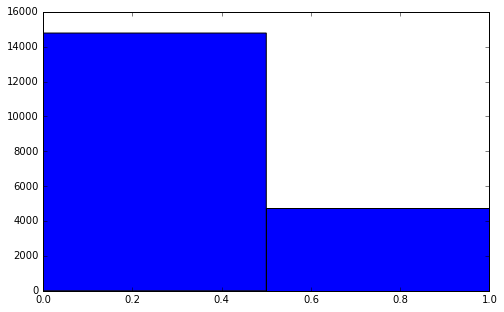

In [251]:
plt.hist(Y_train, bins=2);

In [252]:
Y_train = np.array(Y_train)

print("Zero class ",len(Y_train[np.where(Y_train == 0)])/len(Y_train) * 100, "%  in dataset")
print("First class ",len(Y_train[np.where(Y_train == 1)])/len(Y_train) * 100, "%  in dataset")

Zero class  75.66543816543818 %  in dataset
First class  24.334561834561836 %  in dataset


From this graph we see the distribution of classes in dataset. 


## 2. Age distribution

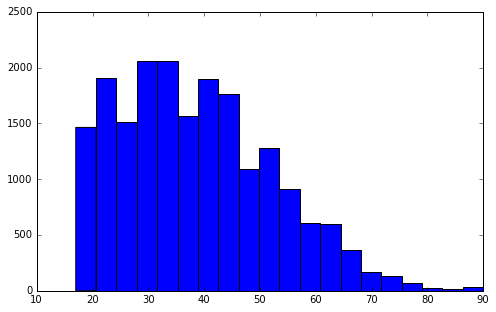

In [253]:
# Age distribution
K = [int(i) for i in features['age']]
plt.hist(K, bins = 20);


# Feature analyses   

As we can note the number of features is 13 

In [256]:
print(len(names)-1)

13


In [265]:
for k in names[1:]:    
    z = len(string_int_map[k]['names'])
    print("Feature ", k, " has ", z, " different type of values")

Feature  age  has  72  different type of values
Feature  workclass  has  9  different type of values
Feature  education  has  16  different type of values
Feature  marital-status  has  7  different type of values
Feature  occupation  has  15  different type of values
Feature  relationship  has  6  different type of values
Feature  race  has  5  different type of values
Feature  sex  has  2  different type of values
Feature  capital-gain  has  112  different type of values
Feature  capital-loss  has  83  different type of values
Feature  hours-per-week  has  87  different type of values
Feature  native-country  has  41  different type of values
Feature  Category  has  0  different type of values


**Here we treat capital-gain and capital-loss, hours-per-week as a categorical feature** 

But this creates a problem of classification, since we have 112, 83 and 87 distinct values. 

Therefore, I plot how much each of this features contribute, to evaluate the importance and to reduce the dimensionality.

### a. Feature histograms

{'Self-emp-not-inc': 1541, 'Local-gov': 1277, 'State-gov': 816, 'Without-pay': 8, 'Never-worked': 6, '?': 1116, 'Self-emp-inc': 670, 'Federal-gov': 569, 'Private': 13533}


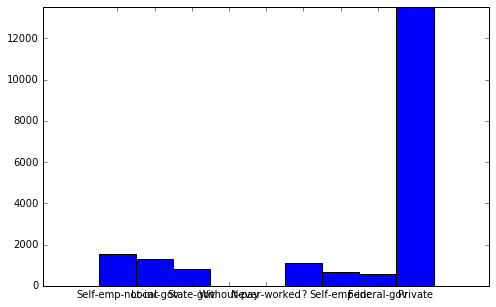

{'Some-college': 4399, 'Assoc-acdm': 647, 'Assoc-voc': 832, '12th': 247, 'HS-grad': 6282, 'Bachelors': 3257, 'Preschool': 33, 'Prof-school': 340, '11th': 693, 'Masters': 1015, '9th': 312, '1st-4th': 96, '10th': 533, '5th-6th': 207, '7th-8th': 373, 'Doctorate': 270}


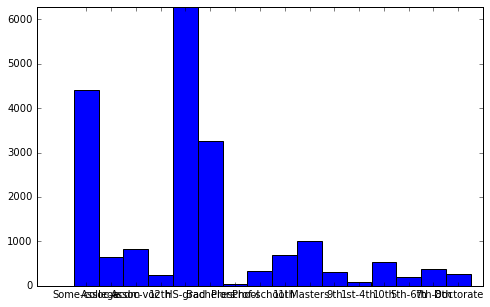

{'Married-AF-spouse': 16, 'Divorced': 2698, 'Widowed': 552, 'Married-spouse-absent': 239, 'Separated': 623, 'Never-married': 6456, 'Married-civ-spouse': 8952}


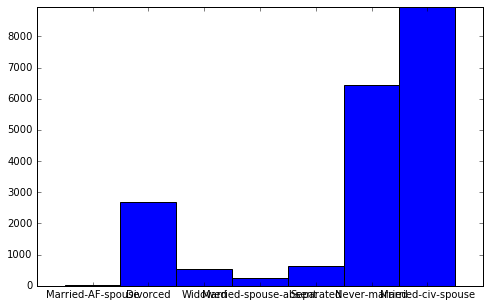

{'Sales': 2190, 'Handlers-cleaners': 850, 'Machine-op-inspct': 1148, 'Priv-house-serv': 91, 'Protective-serv': 393, 'Armed-Forces': 3, 'Other-service': 1961, 'Exec-managerial': 2409, 'Craft-repair': 2467, '?': 1122, 'Tech-support': 556, 'Transport-moving': 972, 'Prof-specialty': 2537, 'Farming-fishing': 578, 'Adm-clerical': 2259}


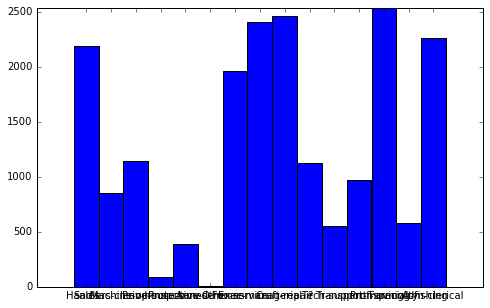

{'Unmarried': 2057, 'Not-in-family': 4986, 'Own-child': 3083, 'Other-relative': 594, 'Wife': 946, 'Husband': 7870}


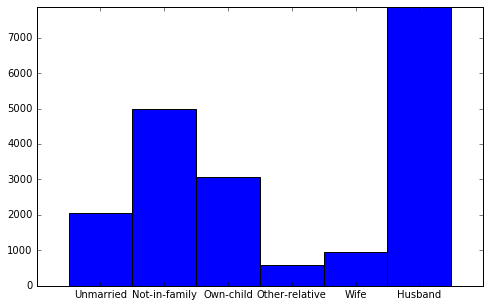

{'Asian-Pac-Islander': 621, 'Black': 1846, 'Amer-Indian-Eskimo': 174, 'Other': 162, 'White': 16733}


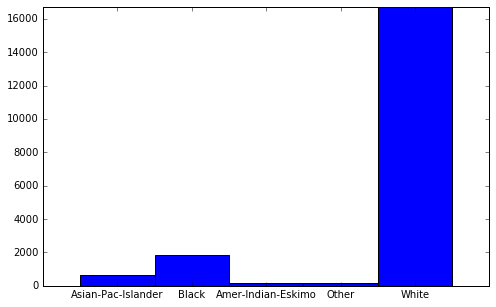

{'Male': 13064, 'Female': 6472}


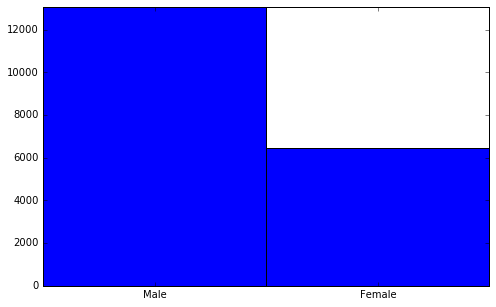

{'27828': 24, '2062': 2, '4386': 48, '1639': 1, '1471': 2, '41310': 2, '6514': 2, '14084': 23, '2936': 1, '3818': 3, '7896': 2, '6097': 1, '1831': 4, '14344': 11, '2977': 4, '20051': 28, '1848': 4, '2407': 12, '1424': 2, '3942': 9, '2414': 5, '3325': 36, '4931': 1, '6418': 5, '4687': 1, '4416': 7, '8614': 35, '3471': 5, '5556': 4, '9562': 2, '7298': 144, '1055': 15, '6497': 8, '2463': 4, '1409': 3, '25236': 5, '7688': 177, '2993': 2, '15831': 3, '15024': 207, '1151': 5, '3674': 6, '15020': 4, '2597': 15, '1455': 1, '2202': 6, '2050': 2, '2036': 1, '594': 16, '2290': 3, '5455': 8, '1173': 2, '2174': 34, '2580': 4, '7430': 7, '6723': 1, '4101': 12, '2354': 5, '2907': 7, '1797': 6, '13550': 16, '10520': 26, '2228': 2, '0': 17886, '6767': 3, '7443': 3, '3432': 2, '2176': 16, '4508': 9, '2538': 1, '2961': 2, '3464': 10, '4650': 30, '4865': 10, '4064': 22, '6849': 21, '5060': 1, '914': 4, '5013': 37, '18481': 1, '10566': 3, '10605': 8, '25124': 2, '2885': 13, '1506': 9, '3273': 3, '3456': 1,

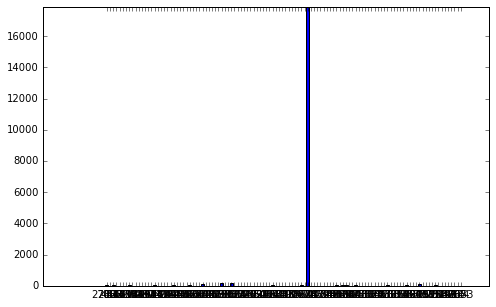

{'2444': 5, '1594': 4, '2206': 5, '2057': 1, '2002': 6, '1741': 16, '1573': 5, '1669': 15, '1408': 10, '1902': 121, '213': 3, '625': 9, '2603': 5, '2489': 1, '1485': 28, '1755': 1, '1564': 19, '1944': 1, '1721': 9, '2472': 1, '2042': 7, '1848': 35, '2205': 6, '3770': 2, '323': 2, '2258': 15, '419': 3, '1974': 14, '2179': 7, '2001': 14, '1726': 4, '3004': 1, '1651': 5, '2149': 1, '1092': 3, '1740': 19, '1719': 11, '2339': 9, '1590': 24, '1887': 95, '1340': 5, '653': 1, '3900': 1, '1648': 2, '2282': 1, '2824': 5, '1380': 5, '1672': 19, '4356': 3, '1504': 10, '1825': 1, '2457': 2, '1977': 103, '2163': 1, '0': 18648, '2547': 4, '2415': 27, '1876': 23, '2352': 2, '810': 1, '2080': 1, '2392': 6, '1628': 6, '1762': 10, '2377': 6, '2246': 3, '1816': 2, '2754': 1, '1258': 3, '2267': 3, '1138': 1, '2051': 14, '1579': 9, '1617': 2, '2174': 6, '1668': 2, '1980': 14, '1411': 1, '2559': 5, '2129': 3, '155': 1, '880': 2, '1602': 29}


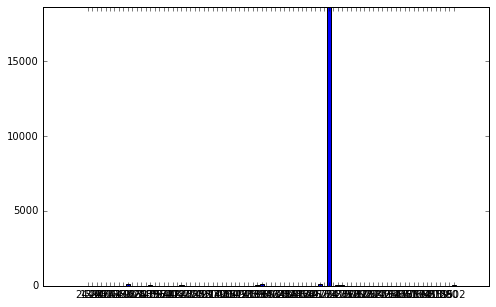

{'35': 778, '22': 28, '52': 83, '21': 14, '5': 41, '9': 8, '61': 1, '78': 5, '25': 403, '6': 45, '30': 674, '51': 8, '54': 23, '58': 14, '24': 168, '23': 12, '73': 1, '96': 3, '17': 14, '29': 4, '74': 1, '59': 5, '86': 2, '50': 1680, '56': 54, '37': 96, '20': 761, '47': 30, '33': 19, '67': 2, '10': 178, '32': 164, '16': 121, '42': 136, '18': 48, '63': 5, '13': 14, '77': 2, '41': 21, '80': 90, '57': 11, '1': 13, '97': 2, '91': 2, '7': 13, '99': 47, '48': 315, '36': 131, '39': 25, '84': 31, '49': 16, '8': 95, '98': 6, '12': 100, '43': 83, '85': 7, '45': 1067, '64': 9, '27': 14, '15': 241, '28': 56, '70': 198, '3': 20, '60': 871, '19': 11, '2': 18, '66': 11, '11': 5, '88': 2, '44': 138, '55': 428, '90': 19, '40': 9084, '75': 41, '76': 3, '31': 3, '62': 11, '34': 20, '65': 147, '4': 33, '26': 21, '46': 47, '72': 39, '53': 15, '14': 23, '68': 5, '38': 283}


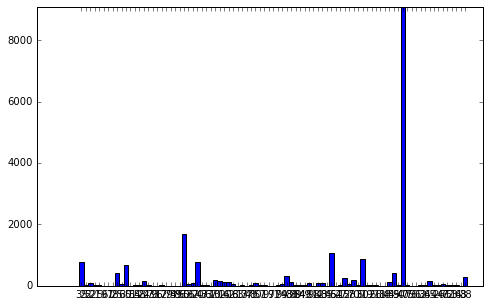

{'Poland': 35, '?': 354, 'Portugal': 19, 'Cuba': 52, 'Cambodia': 11, 'Hungary': 11, 'Canada': 77, 'Haiti': 26, 'Philippines': 132, 'South': 45, 'El-Salvador': 63, 'Iran': 25, 'Yugoslavia': 11, 'Jamaica': 49, 'Thailand': 13, 'Puerto-Rico': 76, 'Peru': 18, 'United-States': 17485, 'Guatemala': 29, 'Hong': 15, 'Columbia': 36, 'England': 49, 'Italy': 45, 'France': 19, 'Nicaragua': 19, 'Honduras': 5, 'Germany': 86, 'Scotland': 7, 'Outlying-US(Guam-USVI-etc)': 10, 'Ecuador': 16, 'Vietnam': 45, 'Greece': 16, 'Laos': 12, 'India': 61, 'Dominican-Republic': 42, 'Mexico': 397, 'Trinadad&Tobago': 10, 'Japan': 40, 'Taiwan': 28, 'China': 34, 'Ireland': 13}


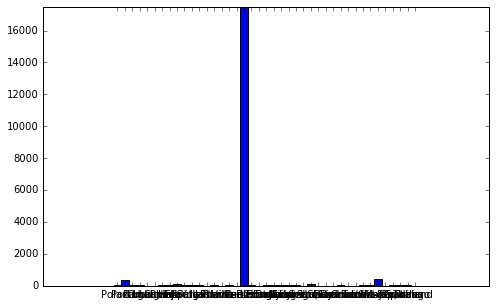

In [266]:
for name in names[2:len(names)-1]:
    d = features_types[name]
    print(d)
    X = np.arange(len(d))
    bar(X, d.values(), align='center', width = 1)
    xticks(X, d.keys())
    ymax = max(d.values()) + 1
    ylim(0, ymax)
    show()
    

Almost every feature contains values that are represent 90 % of a dataset

### Feature importance 

The function buckets is for spliting and reducing feature set into smaller. For more details see experiments below:

In [254]:
def buckets(features, name):
    data = {}
    data['workclass'] = [10., 20., 40., 50.]
    data['education'] = [10., 20., 40., 50., 60.]
    data['marital-status'] = [15., 40.]
    data['relationship'] = [15., 40.]
    data['race'] = [14., 24.]
    data['capital-gain']=[0.,20.,80.,100.]
    data['capital-loss']=[0.,20.,40.,60.,100.]
    data['hours-per-week']=[10.,30.,50.,80.,100.]
    bins = []
    if name in data.keys():
        bins = data[name]
    else:
        bins = [np.percentile(features,i) for i in range(0,100,20)]
    
    d = np.digitize(features, bins) # Calculate the bin number of each feature
    return d
    
    

To evaluate feature importance we plot histograms with distinct feature values and count how many of them represent class 1 (income). 

For feature  workclass : 
-----------------
[1 1 1 1 1 1 2 1 2 1 ..., 1 1 7 6 5 2 1 1 2 1]

[22.21236976280204, 29.20908379013312, 9.67741935483871, 36.90685413005272, 27.968851395197923, 58.95522388059702, 28.308823529411764, 0.0, 0.0]
{'Self-emp-not-inc': 2, 'Local-gov': 2, 'State-gov': 2, 'Without-pay': 0, 'Never-worked': 0, '?': 0, 'Self-emp-inc': 4, 'Federal-gov': 2, 'Private': 2}


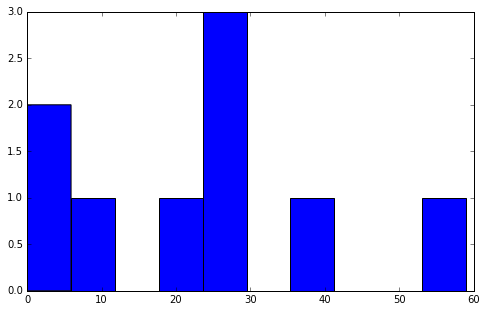

For feature  education : 
-----------------
[1 2 3 4 5 2 6 1 7 1 ..., 5 6 9 2 2 6 1 1 2 6]

[19.072516481018415, 41.57199877187596, 25.19319938176198, 4.3478260869565215, 5.483405483405483, 15.91849729385546, 28.365384615384613, 55.073891625615765, 74.81481481481481, 75.29411764705883, 7.129455909943714, 5.630026809651475, 4.166666666666666, 5.128205128205128, 7.6923076923076925, 0.0]
{'Some-college': 1, 'Assoc-acdm': 2, 'Assoc-voc': 2, '12th': 0, 'HS-grad': 1, 'Bachelors': 3, 'Preschool': 0, 'Prof-school': 5, '11th': 0, 'Masters': 4, '9th': 0, '1st-4th': 0, '10th': 0, '5th-6th': 0, '7th-8th': 0, 'Doctorate': 5}


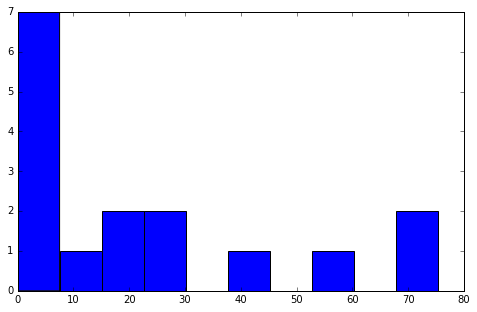

For feature  marital-status : 
-----------------
[1 2 3 3 1 3 4 1 1 2 ..., 2 3 3 3 1 2 3 2 3 3]

[10.266864343958487, 4.724287484510533, 45.4088471849866, 5.617977528089887, 7.531380753138076, 8.51449275362319, 43.75]
{'Married-AF-spouse': 2, 'Divorced': 0, 'Widowed': 0, 'Married-spouse-absent': 0, 'Separated': 0, 'Never-married': 0, 'Married-civ-spouse': 2}


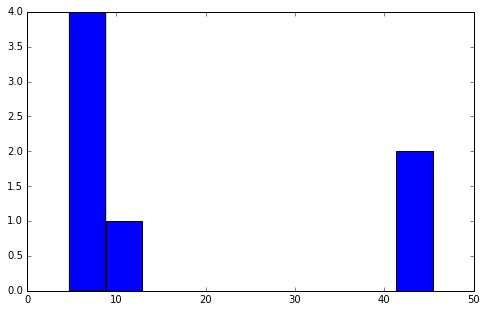

For feature  occupation : 
-----------------
[ 1  2  3  4  4  2  5  1  2  1 ...,  9  5  2  6  6  5  3 12  6  6]

[13.94422310756972, 45.053212455656286, 26.575342465753426, 20.781893004115226, 4.385517593064763, 48.692403486924036, 9.62566844919786, 34.096692111959285, 23.83461694365626, 11.585365853658537, 11.245674740484429, 6.588235294117648, 30.39568345323741, 0.0, 0.0]
{'Sales': 4, 'Handlers-cleaners': 2, 'Machine-op-inspct': 3, 'Priv-house-serv': 1, 'Protective-serv': 5, 'Armed-Forces': 1, 'Other-service': 1, 'Exec-managerial': 5, 'Craft-repair': 4, '?': 2, 'Tech-support': 4, 'Transport-moving': 3, 'Prof-specialty': 5, 'Farming-fishing': 2, 'Adm-clerical': 3}


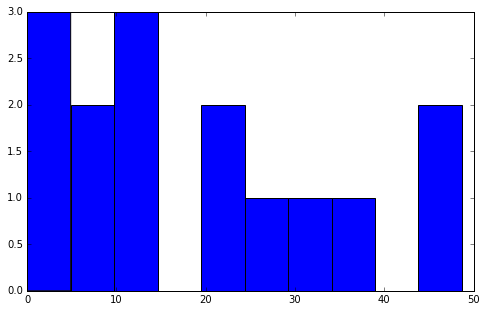

For feature  relationship : 
-----------------
[1 2 3 3 2 4 2 2 1 4 ..., 2 3 6 3 2 4 3 4 3 3]

[6.465726786582401, 10.389089450461292, 45.438373570520966, 1.1352578657152124, 4.377104377104377, 49.2600422832981]
{'Unmarried': 0, 'Not-in-family': 0, 'Own-child': 0, 'Other-relative': 0, 'Wife': 2, 'Husband': 2}


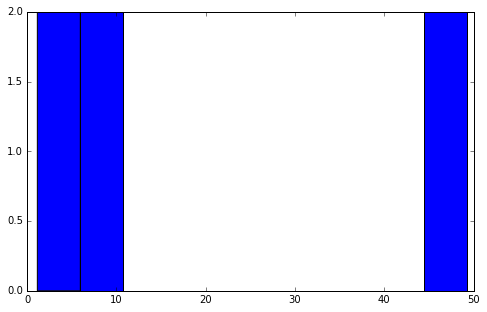

For feature  race : 
-----------------
[1 1 1 2 1 1 3 1 1 1 ..., 1 1 1 1 1 1 1 5 1 1]

[25.79931871152812, 11.494252873563218, 12.892741061755148, 25.925925925925924, 11.11111111111111]
{'Asian-Pac-Islander': 2, 'Black': 0, 'Amer-Indian-Eskimo': 0, 'Other': 0, 'White': 2}


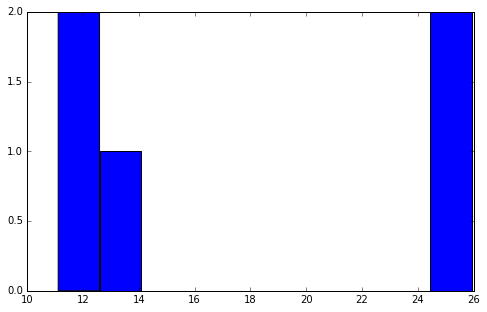

For feature  sex : 
-----------------
[1 1 2 2 2 2 1 1 2 1 ..., 2 2 1 2 2 2 2 2 2 2]

[11.294808405438813, 30.794549908144518]
{'Male': 5, 'Female': 1}


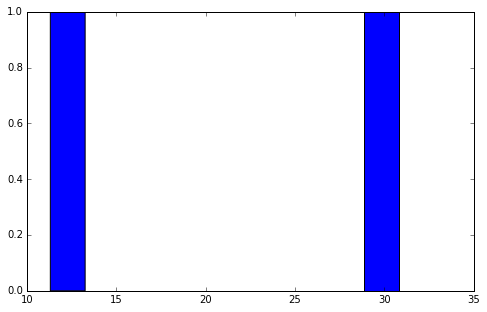

For feature  capital-gain : 
-----------------
[ 1  1  1  1  1  1  1  1  1  1 ...,  1  1  1  1  1  1  1  1 16  1]

[20.781616907078163, 0.0, 100.0, 100.0, 0.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0, 100.0, 100.0, 100.0, 92.1875, 100.0, 0.0, 87.5, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 100.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 100.0, 0.0, 0.0, 0.0]
{'27828': 4, '2062': 1, '4386': 3, '1639': 1, '1471': 1, '41310': 1, '6514': 4, '14084': 4, '2936': 1, '3818': 1, '7896': 4, '6097': 4, '1831': 1, '14344': 4, '2977': 1, '20051': 4, '1848': 1, '2407': 1, '1424': 1, '3942': 1, '2414': 1, '3325': 1

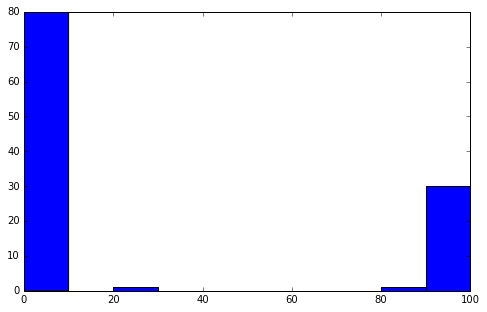

For feature  capital-loss : 
-----------------
[ 1  1  1  2  3  1  1  1  1  1 ...,  1  1  2 30  1  1  1  1  1  1]

[23.015873015873016, 94.21487603305785, 100.0, 0.0, 100.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 67.85714285714286, 0.0, 100.0, 0.0, 100.0, 46.666666666666664, 0.0, 0.0, 100.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 100.0, 0.0, 100.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 100.0, 0.0, 0.0, 0.0, 100.0, 0.0, 100.0]
{'2444': 5, '1594': 1, '2206': 1, '2057': 1, '2002': 1, '1741': 1, '1573': 1, '1669': 1, '1408': 1, '1902': 4, '213': 1, '625': 1, '2603': 1, '2489': 1, '1485': 4, '1755': 5, '1564': 5, '1944': 1, '1721': 1, '2472': 5, '2042': 1, '1848': 5, '2205': 1, '3770': 1, '323': 1, '2258': 3, '419': 1, '1974': 1, '2179': 1, '2001': 1, '1726': 1, '3004': 5, '1651': 1, '2149': 1, '10

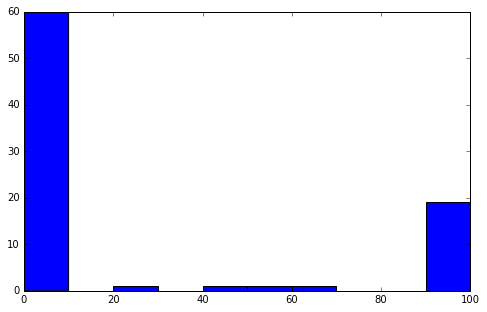

For feature  hours-per-week : 
-----------------
[ 1  2  2  2  3  4  5  6  2  2 ...,  2  2  8  6  5  2  6 21  2  2]

[34.05797101449276, 21.56538969616909, 66.66666666666666, 39.02439024390244, 43.05396096440873, 46.726190476190474, 6.315789473684211, 40.42553191489361, 38.98781630740394, 3.970223325062035, 40.963855421686745, 4.979253112033195, 45.794392523364486, 45.57823129251701, 14.781491002570693, 4.958677685950414, 19.78798586572438, 32.35294117647059, 29.78723404255319, 6.044678055190539, 6.231454005934718, 6.0, 29.841269841269842, 37.03703703703704, 28.57142857142857, 13.414634146341465, 43.333333333333336, 12.5, 21.686746987951807, 36.36363636363637, 19.083969465648856, 12.5, 23.809523809523807, 7.142857142857142, 16.0, 30.0, 7.865168539325842, 28.205128205128204, 13.541666666666666, 9.090909090909092, 38.38383838383838, 14.634146341463413, 12.5, 7.738095238095238, 4.3478260869565215, 23.076923076923077, 6.666666666666667, 0.0, 10.714285714285714, 9.090909090909092, 7.1428571

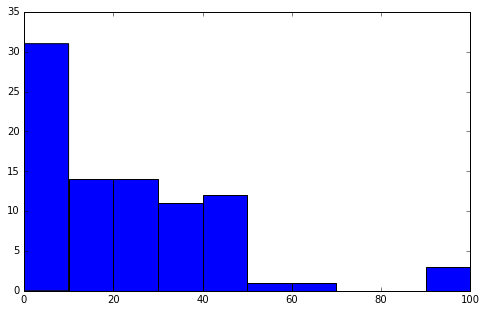

For feature  native-country : 
-----------------
[1 1 1 1 1 1 2 1 1 1 ..., 1 1 1 1 1 1 1 1 1 1]

[24.80411781527023, 25.423728813559322, 34.42622950819672, 5.541561712846348, 7.936507936507936, 30.612244897959183, 36.84210526315789, 33.72093023255814, 5.555555555555555, 32.57575757575758, 22.22222222222222, 26.923076923076923, 32.467532467532465, 0.0, 13.157894736842104, 33.33333333333333, 32.35294117647059, 52.0, 31.25, 42.5, 36.36363636363637, 2.380952380952381, 23.076923076923077, 28.888888888888886, 16.3265306122449, 6.896551724137931, 6.666666666666667, 5.263157894736842, 23.076923076923077, 22.857142857142858, 32.142857142857146, 27.27272727272727, 45.45454545454545, 7.6923076923076925, 5.263157894736842, 10.0, 5.555555555555555, 28.57142857142857, 0.0, 0.0, 18.75]
{'Poland': 3, '?': 3, 'Portugal': 1, 'Cuba': 3, 'Cambodia': 5, 'Hungary': 4, 'Canada': 4, 'Haiti': 2, 'Philippines': 5, 'South': 3, 'El-Salvador': 2, 'Iran': 5, 'Yugoslavia': 5, 'Jamaica': 2, 'Thailand': 3, 'Puerto-Ric

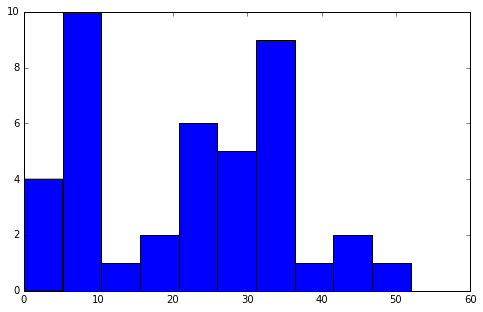

In [14]:

Y_train = np.array(Y_train)
f_names =  names[2:13]
final_maping = {}

for f_name in f_names:
    FP = np.array(features[f_name])
    final_maping[f_name] = {}

    #plt.hist(FP)

    #
    #plt.scatter(features['sex'], Y_train)


    FP_0 = FP[np.where(Y_train == 0)]
    FP_1 = FP[np.where(Y_train == 1)]


    total = string_int_map[f_name]['inc']
    print("For feature ", f_name, ": ")
   
    f_tp = []
    for i in range(1, total):
        zeros = len(FP_0[np.where(FP_0 == i)])
        ones = len(FP_1[np.where(FP_1 == i)])
        
        in_feat_name = string_int_map[f_name]['names'][i-1]
    #   print(i, " ", in_feat_name)
    #   print("Total: ", zeros + ones)
        total_num = zeros + ones
        f_tp.append(ones/total_num * 100)
    #  print("The procent of zeros vs ones ", zeros/total_num * 100," ",ones/total_num * 100)
      #   print("Procent in dataset ", total_num/len(FP) * 100)
    
    print("-----------------")
    print(FP)
    print()
    print(f_tp)
    med = buckets(f_tp, f_name)
    name_list = string_int_map[f_name]['names']
    for k in range(0, len(name_list)): 
        final_maping[f_name][name_list[k]] = med[k] 
    print(final_maping[f_name])
    plt.hist(f_tp)
    plt.show()


As you may note there for different features, many values give almost(sometimes exactly the same) the same procent of of class 1. 


### Feature classes spliting

**Here and below we represent how we combined features and what is the procent of people having income**

**Workclass**

In this class we combine: 
   
 - 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Federal-gov' in to one giving 30% 
   
 - Self-emp-inc - 58 % 
   
 - Without-pay': 0, 'Never-worked': 0, '?': 0  < 10 %
   
 

**Education**

In this class we combine: 
   
 - '12th', '7th-8th', '11th', ''9th', '1st-4th', '10th', '5th-6th', 'Preschool'
 
 - Some-college', 'HS-grad', 
   
 - Assoc-acdm', 'Assoc-voc'
 
 - 'Bachelors'
  
 - 'Masters'
 
 - 'Prof-school',   'Doctorate'

We design the bins experimently and make feature spliting for all features

Each feature is mapped to integer: 

In [267]:
# mapping 
# Features to remove: id, sex, race
removed_features = ['Id', 'Category']
X_train_norm = []
for row in X_train:
    row_norm = []
    for i in range(0, len(names)):
        if names[i] not in removed_features:
            if names[i]=='age':
                row_norm.append(int(row[i]))
            else:
                row_norm.append(final_maping[names[i]][row[i]])
    X_train_norm.append(row_norm)


### Dataset spliting

In [268]:
from random import sample
N_train=len(X_train_norm)
print(N_train)
N_test = N_train//5
X_test = X_train_norm[N_train - N_test:]
X_train1 = X_train_norm[:N_train - N_test]
Y_test = Y_train[N_train - N_test:]
Y_train1 = Y_train[:N_train - N_test]

print(len(X_test))
print(len(X_train1))



19536
3907
15629


To evalute accuracy I decided to split my dataset into 80 (train)/ 20 (test)

### 3.Plot how error-rate depends on the number of nearest neighbours for K-NN method

You should use [K-NN from scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) 

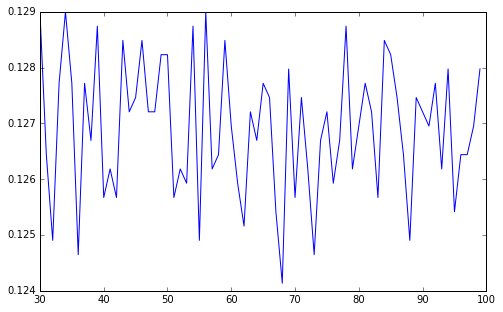

Depth 11
68
0.124136165856


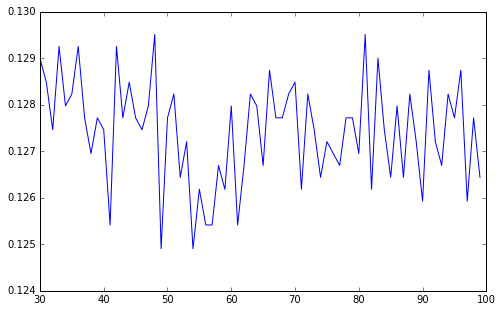

Depth 15
49
0.124904018428


In [269]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

M = 50
N = 150
estimators = range(30, 100, 1)
depths = [11, 15]
result_model = RandomForestClassifier(max_depth=15, n_estimators=53, criterion='entropy') 
min_error = 0
for d in depths:
    results = []
    for K in estimators:
        # model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=d, criterion='entropy'),
        #                                    n_estimators=K)
        model = RandomForestClassifier(max_depth=d, n_estimators=K, criterion='entropy') 
            # entropy 78 129511 12925 max_depth = 10
                                                                                      # entropy 0.1277 58  depth 12 1287 -_-
                                                                                      # depth 10 entropy 127719 135
                                                                                      # depth 11 entropy 136 1274
                                                                                      #
        #    model = KNN(10, p =K)
        #    model = GradientBoostingClassifier(n_estimators=84, max_depth=4)

        model.fit(X_train1, Y_train1)
        Y_pred = model.predict(X_test)
        min_er = 1-accuracy_score(Y_test, Y_pred)
        if min_er < min_error:
            min_error = min_er
            result_model = model
        results.append(min_er)

    plt.plot(estimators, results)
    plt.show()
    print("Depth",  d)
    print(estimators[argmin(results)])
    print(min(results))


I tried models: 
 - KNN with GridCV 
 - AdaBoost Classifier with DesicionTree max_depth = 1
 - GradientBoostingClassifier
 - RandomForest with different parametrs and split criteria
 

**The experiments showed that RandomForest shows best result on test data with parameters max_depth = [11;15], n_estim = [70;80]**


**Experiments with PCA **:

Performing grid search...
pipeline: ['pca', 'rand']
parameters:
{'rand__max_depth': [11, 12, 13, 14], 'pca__n_components': [2, 3, 4], 'rand__n_estimators': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]}
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  8.6min finished



Best score: 0.840
Best parameters set:
	pca__n_components: 4
	rand__max_depth: 11
	rand__n_estimators: 63


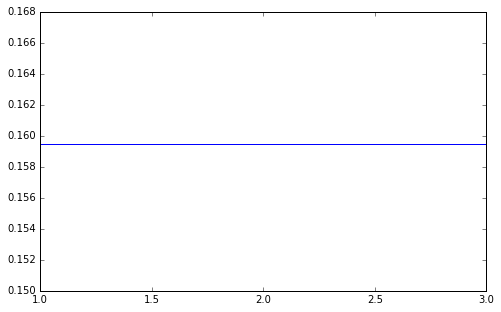

In [270]:
# Model with PCA
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
parameters = {
        'pca__n_components':[2,3,4],
        # 'knn__n_neighbors':(5,7,11,15)
        # 'svm__gamma':np.logspace(-3, 3, 7)
        'rand__max_depth':[x for x in range(11,15)],
        'rand__n_estimators':[x for x in range(40,80)]
    }

    # pipe = Pipeline([('pca', PCA()), ('knn',KNeighborsClassifier())])
    # pipe = Pipeline([('pca', PCA()), ('svm',svm.SVC(kernel='rbf'))])
    # pipe = Pipeline([('pca', PCA()), ('tree',DecisionTreeClassifier())])
pipe = Pipeline([('pca', PCA()),('rand', RandomForestClassifier())])
grid_search = GridSearchCV(pipe, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipe.steps])
print("parameters:")
print(parameters)

grid_search.fit(X_train1, Y_train1)

print()
results = []
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    Y_pred = grid_search.best_estimator_.predict(X_test)
    results.append(1-accuracy_score(Y_test, Y_pred))

plt.plot(range(1, len(results)+1), results)





# Final tests 

In [227]:
csvfile = open('test.csv', 'r')
database = csv.reader(csvfile, delimiter=',')


One problem that occured during the test evaluation - in test data we have numbers not presented in train dataset, therefore we couldn't map them. 

To solve this problem, I map all new values into neutral state, or most common bin. 

In [228]:
X_t = []
i = 0
removed_features = ['Id', 'Category']
ids = []
for row in database:
        if i == 0:
            names = row
            i+=1
        else:
            # Zero row - id
            # First row Age
            # Workclass: Second row is private, self-gov, federal
            # Thrid class: education
            # Features
            row_norm = []
            ids.append(row[0])
            for z in range(0, len(names)):
                if names[z] not in removed_features:
                    if names[z] == 'age':
                        row_norm.append(int(row[z]))
                    else:
                        if row[z] not in final_maping[names[z]].keys():
                            print(row[z], "Not in key")
                            if names[z] == 'capital-gain':
                                row_norm.append(1)
                            elif names[z] == 'capital-loss':
                                row_norm.append(2)
                            else:
                                row_norm.append(0)
                        else:
                            row_norm.append(final_maping[names[z]][row[z]])
                        
            X_t.append(row_norm)
            
print(X_t)


2231 Not in key
34095 Not in key
2231 Not in key
1539 Not in key
2009 Not in key
95 Not in key
34095 Not in key
401 Not in key
34095 Not in key
3683 Not in key
34095 Not in key
2201 Not in key
2009 Not in key
1735 Not in key
1844 Not in key
974 Not in key
2009 Not in key
401 Not in key
87 Not in key
Holand-Netherlands Not in key
92 Not in key
11678 Not in key
2467 Not in key
3683 Not in key
89 Not in key
974 Not in key
89 Not in key
2238 Not in key
82 Not in key
2238 Not in key
1111 Not in key
95 Not in key
94 Not in key
34095 Not in key
81 Not in key
1735 Not in key
81 Not in key
2387 Not in key
22040 Not in key
11678 Not in key
2231 Not in key
81 Not in key
[[45, 4, 0, 2, 4, 2, 2, 5, 2, 2, 1, 3], [57, 2, 1, 0, 3, 0, 2, 1, 2, 2, 1, 3], [36, 2, 1, 0, 4, 0, 2, 5, 2, 2, 1, 3], [55, 2, 0, 2, 4, 2, 2, 5, 2, 2, 1, 3], [48, 2, 4, 2, 5, 2, 2, 5, 2, 2, 1, 3], [53, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 3], [21, 2, 1, 0, 4, 0, 2, 5, 2, 2, 1, 3], [46, 2, 1, 2, 3, 2, 2, 5, 1, 2, 1, 2], [48, 2, 0, 0, 4, 0,

In [224]:
# mapping 
# Features to remove: id, sex, race
removed_features = ['Id','Category']
X_train_norm = []
X_train_norm2 = []
for row in X_train:
    row_norm = []
    row_norm2 = []
    for i in range(0, len(names)):
        if names[i] not in removed_features:
            if names[i]=='age':
                row_norm.append(int(row[i]))
                row_norm2.append(int(row[i]))
            
            else:
                t_list = string_int_map[names[i]]['names']
                for j in range(0, len(t_list)):
                    if t_list[j] == row[i]:
                        row_norm2.append(j)
                row_norm.append(final_maping[names[i]][row[i]])
    X_train_norm.append(row_norm)
    X_train_norm2.append(row_norm2)

Also I tried to reduce the feature dimentions using feature_selection

In [229]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV

er = 1.0
thr = 0.1249
it = 1
#model = RandomForestClassifier(max_depth=15, n_estimators=63, criterion='entropy') 
d = 1

#estim = range(70, 100, 10)
estim = [80]
depths = [1]
K = len(estim)
i = 0
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, criterion='gini'), n_estimators=80)
rfecv = RFECV(estimator=model, step=1, cv=2, scoring='accuracy')
rfecv.fit(X_train1, Y_train1)
Y_pred = rfecv.predict(X_test)
er = 1-accuracy_score(Y_test, Y_pred)
print("depth : ", e,  " Error = ", er)

Y_pred = rfecv.predict(X_t)
print(Y_pred)


depth :  80  Error =  0.124136165856
[0 0 0 0 1 0 0 0 0 0 ..., 0 0 0 0 0 1 0 0 1 0]


**Write to result file:**

In [230]:
with open('result.csv', 'w') as csvfile:
    fieldnames = ['Id', 'Category']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(0, len(Y_pred)):
        to_write = {} 
        to_write['Id'] = ids[i]
        to_write['Category'] = Y_pred[i]
        writer.writerow(to_write)
